___

<center> <h1> CREDIT CARD CUSTOMER SEGMENTATION

___

### BUSINESS CONTEXT

- The draft prospectus puts out interesting data on the credit card industry. It says credit card dues are expected to grow at a compound annual growth rate (CAGR) of 23 per cent to reach Rs 3.3 trillion by FY 24. And, the credit card spends is expected to grow to Rs 15 trillion by FY24 from Rs 6 trillion in FY19. This will be supported by spending growth and increasing EMI-based payments using credit cards. Moreover, the number of credit cards outstanding is also projected to grow at fast pace of 23 per cent CAGR in the next five years, according to CRISIL Research.<br>
<br>
- Customer segmentation is one of the most fundamental building blocks in getting to know customers. It is essential for industries where customer interaction is frequent and varied, as each interaction provides insight into opportunities and risks for every individual. The credit card industry is on par with telecommunications, e-commerce, and retail from this perspective, and the industry gains significant ROI from segmentation initiatives. Surprisingly, all around the world, there are many banks still not taking advantage of this opportunity, frequently due to a lack of tools or in-house resources to process and digest big data sources, sitting on top of a gold mine that erodes each day when left untouched.

## BUSINESS PROBLEM

>The goal is to discover the **Customer Segmentation** of a bank to define marketing strategy, by looking through their behavior/profile while using Credit Card.

### DATA DICTIONARY

The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables. The explanation of every variables:<br>
- **CUST_ID** : Identification of Credit Card holder (Categorical)<br>
- **BALANCE** : Balance amount left in their account to make purchases<br>
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
- **PURCHASES** : Amount of purchases made from account<br>
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go<br>
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment<br>
- **CASH_ADVANCE** : Cash in advance given by the user<br>
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently)<br>
- **ONEOFF_PURCHASES_FREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
- **PURCHASES_INSTALLMENTS_FREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
- **CASH_ADVANCE_FREQUENCY** : How frequently the cash in advance being paid<br>
- **CASH_ADVANCE_TRX** : Number of Transactions made with “Cash in Advanced”<br>
- **PURCHASES_TRX** : Number of purchase transactions made<br>
- **CREDIT_LIMIT** : Limit of Credit Card for user<br>
- **PAYMENTS** : Amount of Payment done by user<br>
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user<br>
- **PRC_FULL_PAYMENT** : Percent of full payment paid by user<br>
- **TENURE** : Tenure of credit card service for user<br>

___

<h4> IMPORTING REQUIRED LIBRARIES

In [14]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# parameters
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# warnings
import warnings
warnings.filterwarnings('ignore')

<h4> IMPORTING THE DATASET

In [2]:
# reading the dataset
credit = pd.read_csv('CC_GENERAL.csv')  

___

## DATA AUDIT

In [3]:
# first five rows of the dataset
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# last five rows of the dataset
credit.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
# shape of the dataset
credit.shape

(8950, 18)

In [6]:
# columns present in the dataset
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
# a concise summary of the dataset
credit.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    int64
PURCHASES_TRX                       int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              int64
dtypes: float64(14), int64(3), object(1)
memory usage: 1.2+ MB


>- All variables are in the **correct structure**, no need to re-adjust their structure. And eventually, all the variables are numerics except CUST_ID.
- We will take out the **CUST_ID** since it is a unique variable and we can’t get further information from it.

In [8]:
# dropping CUST_ID because it won't play any role in customer segmentation
credit = credit.drop(columns=['CUST_ID'])

In [9]:
# number of missing values in the dataset
credit.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

> Surely, there are some **missing values** in the dataset, **313 in MINIMUM_PAYMENTS and 1 in CREDIT_LIMIT**. We will treat them in the data preparation part.

In [10]:
# Creating a UDF to get the summary of the continous variables for data exploration and analysis
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.isnull().sum()/x.isnull().count()*100, x.sum(), x.min(), 
                      x.mean(), x.median(), x.std(), x.var(), x.quantile(.01), x.quantile(.05), x.quantile(.10), 
                      x.quantile(.25), x.quantile(.50), x.quantile(.75), x.quantile(.90), x.quantile(.95), 
                      x.quantile(.99), x.max()], 
                      index = ['N', 'NMISS', '%MISS', 'SUM', 'MIN', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'P1', 'P5', 
                               'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [11]:
# a brief summary of the continous variables
credit.apply(continous_var_summary).T.round(2)

,N,NMISS,%MISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,0.00,14002049.71,0.00,1564.47,873.39,2081.53,4332774.97,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,0.00,7851.57,0.00,0.88,1.00,0.24,0.06,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,0.00,8978683.26,0.00,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,0.00,5302314.47,0.00,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,0.00,3679055.42,0.00,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,0.00,8760896.46,0.00,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,0.00,4388.64,0.00,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,0.00,1812.00,0.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,0.00,3261.71,0.00,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,0.00,1209.54,0.00,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


In [12]:
# computing pairwise correlation of columns
corrm = credit.corr(method='pearson')

# exporting correaltion file
corrm.to_csv('corrm.csv', index=False)
corrm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


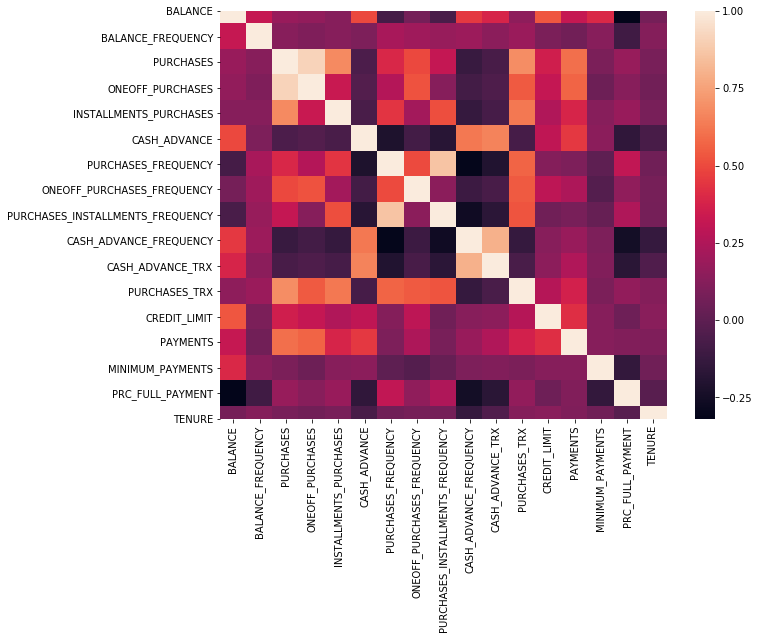

In [15]:
# graphical representation of correlation matrix using heatmap
sns.heatmap(corrm)

Since all of the variables are numerics, it is easier to see their correlation by using correlation matrix.<br>
>- Most of the variables are having **positive correlation** rather than negative one.<br><br>
- Some of them even **strongly correlated**, just like **PURCHASES and ONEOFF_PURCHASES** (0.91), indicating most customers spend their purchase in one-go, the same thing goes to **PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY** (0.86). It indicates that there some strong multicollinearity between them. But since we are not going regression model, it won’t be a problem.<br><br>
- The **PURCHASES and PURCHASES_TRX** (0.68) has **strong correlation**, indicating that the amount of purchase comes along with the transaction numbers.<br><br>
- Some interesting finding can be also found between **CASH_ADVANCE and the BALANCE** (0.49). It seems that customer who has **bigger balance** will tend to have payment with cash in advance.<br><br>
- Customer with bigger **BALANCE** tends to has a **bigger CREDIT_LIMIT**, since their correlation is positive (0.53).<br><br>
- **TENURE** seems has **weak correlation** with other variables, it seems TENURE did not affected by the customer’s behavior. We will check it again upon the PCA analysis.

<h3> DATA DISTRIBUTION

- Let us see whether there is some interesting finding on the data distribution, especially on Balance, Purchase, Credit Limit, and Tenure.

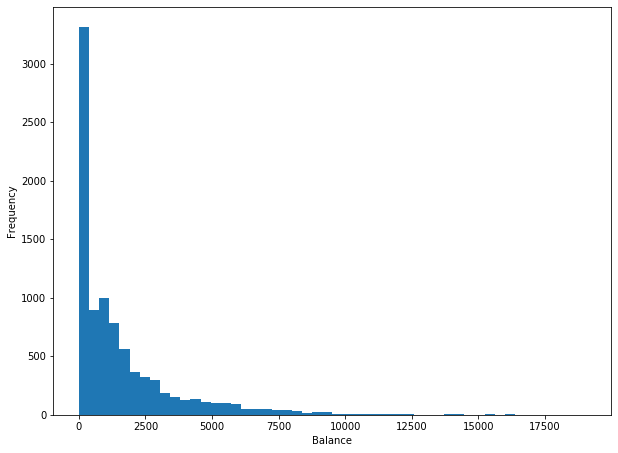

In [16]:
# Customer Balance
plt.hist(credit.BALANCE, bins=50)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

> It seems most of the customers who use their Credit Card would **maximize the usage** of their credit balance, **until it reach 0**.

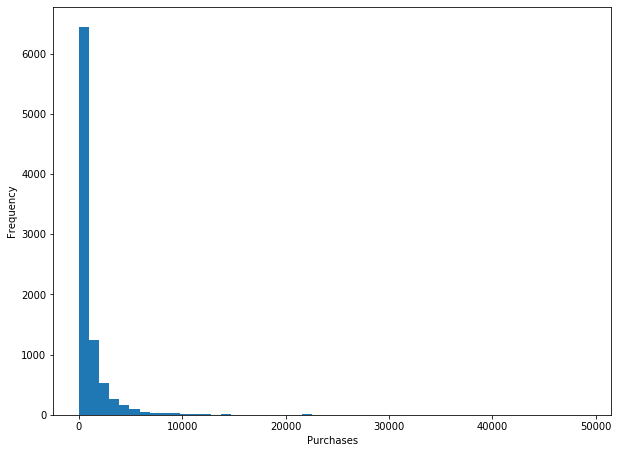

In [17]:
# Customer Purchase
plt.hist(credit.PURCHASES, bins=50)
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

>Suprisingly, most of the **customers don’t use their Credit Card to purchase** something. Only around 38% who ever use their Credit Card to purchase something (Purchase value > 0).

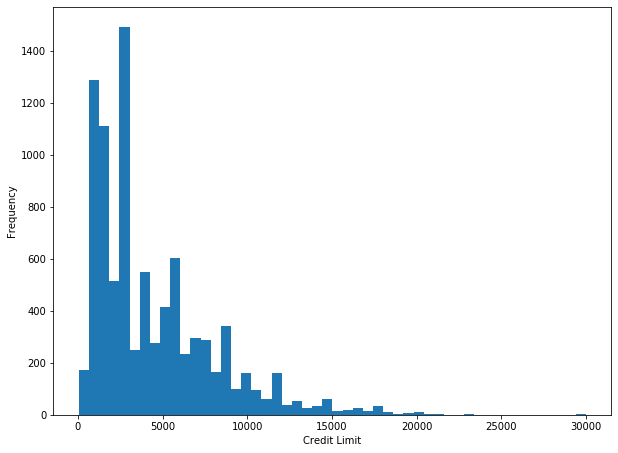

In [18]:
# Credit Limit
plt.hist(credit.CREDIT_LIMIT, bins=50)
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

>Most of the customers have Credit Limit on 1032 (there are 144 customers who has 0 credit limit, we will assume that their credit application has not approved yet). The frequency goes lower along with the increment of Credit Limit, even there are some small peaks again at 6196 - 7229.

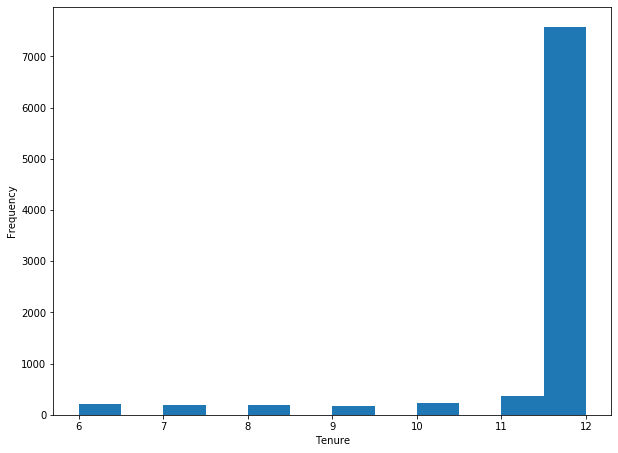

In [19]:
# Tenure
plt.hist(credit.TENURE, bins=12)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

> Most of the customers have **12 months Tenure**, with significant numbers compared to other tenure.

___

## DATA PREPARATION

<h4> TREATING OUTLIERS

In [20]:
# clipping outliers with p5 and p95
credit = credit.apply(lambda x: x.clip(lower=x.dropna().quantile(.05), upper=x.quantile(.95)))

<H4> TREATING MISSING VALUES

In [21]:
# creating a UDF to treat missing values
def missing_imputation(x, stats = 'mean'):
    if (x.dtype == 'float64') | (x.dtype == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median)
    else:
        x = x.fillna(x.mode())
    return x

In [22]:
# imputing missing values
credit = credit.apply(missing_imputation)

## DERIVING NEW KEY PERFORMANCE INDICATORS ( KPIs )

<h4>  MONTHLY AVERAGE PURCHASE

- To find the monthly average amount of purchases made from account

In [23]:
# calculating Monthly average purchase
credit['Monthly_avg_purchase'] = credit['PURCHASES'] / credit['TENURE']

<H4> MONTHLY CASH ADVANCE AMOUNT

- To find the monthly Cash in advance given by the user

In [24]:
# calculating monthly cash advance amount
credit['Monthly_cash_advance'] = credit['CASH_ADVANCE'] / credit['TENURE']

<H4> PURCHASES BY TYPE

- To find what type of purchases customers are making on credit card

In [25]:
# creating a UDF to create a new KPI 'Purchase_by_type'
def purchase_type(credit):
    if (credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] == 0):
        return 'None'
    if (credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] > 0):
         return 'Both'
    if (credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] == 0):
        return 'One_off'
    if (credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] > 0):
        return 'Installment_purchases'

credit['Purchase_type'] = credit.apply(purchase_type, axis=1)

<H4> LIMIT USAGE (BALANCE TO CREDIT LIMIT RATIO)

- To find the credit score of customers.
- Lower value implies cutomers are maintaing thier balance properly.

In [26]:
# limit usage
credit['Limit_usage'] = credit.apply(lambda x: x['BALANCE'] / x['CREDIT_LIMIT'], axis=1)

<H4> PAYMENTS TO MINIMUM PAYMENT RATIO

- To find the Amount of Payment done by user with respect to mininmum payment needs to be done by the user.

In [27]:
# payment to minimum payment ratio
credit['Payment_minpay'] = credit.apply(lambda x: x['PAYMENTS'] / x['MINIMUM_PAYMENTS'], axis=1)

<h2> INSIGHTS - ADVANCED REPORTING

<h3> KPI ONE

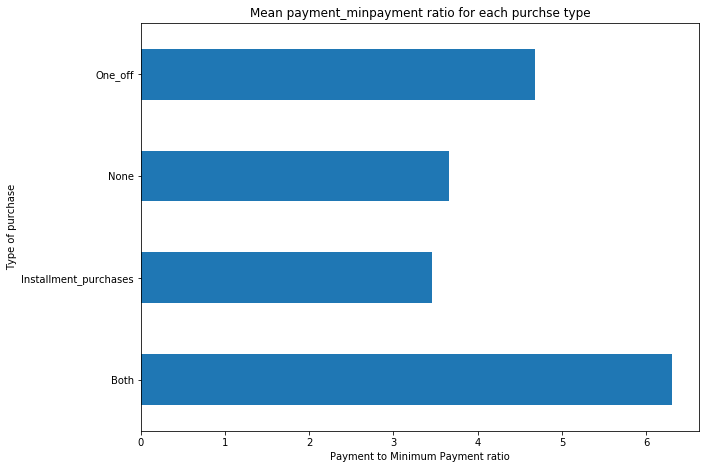

In [28]:
# graphical representation of Mean payment to minimum payment ratio for each purchse type
credit.groupby('Purchase_type')['Payment_minpay'].mean().plot.barh()
plt.title('Mean payment_minpayment ratio for each purchse type')
plt.xlabel('Payment to Minimum Payment ratio')
plt.ylabel('Type of purchase')
plt.show()

> It seems that customers who are doing **both the purchases** i.e. oneoff purchase and installments purchase are **paying dues on time** as compared to those who are doing the transactions separately.

<h3> KPI TWO

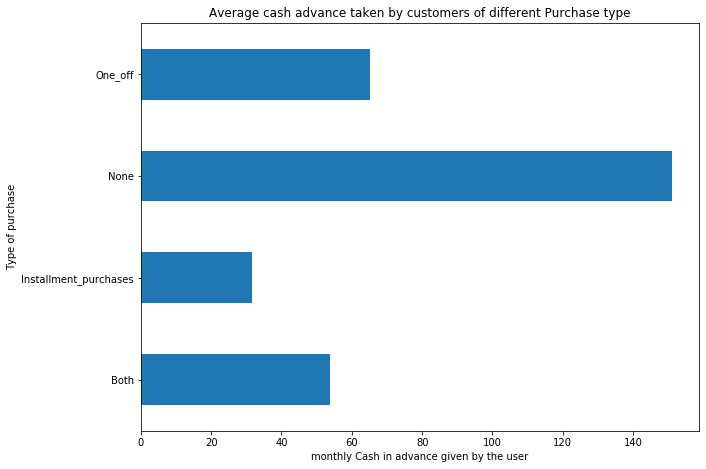

In [29]:
# graphical representation of average cash advance taken by customers of different Purchase type
credit.groupby('Purchase_type')['Monthly_cash_advance'].mean().plot.barh()
plt.title('Average cash advance taken by customers of different Purchase type')
plt.xlabel('monthly Cash in advance given by the user')
plt.ylabel('Type of purchase')
plt.show()

> Customers who do **neither one-off nor installment** purchases take more **cash on advance**.

<h3> KPI THREE

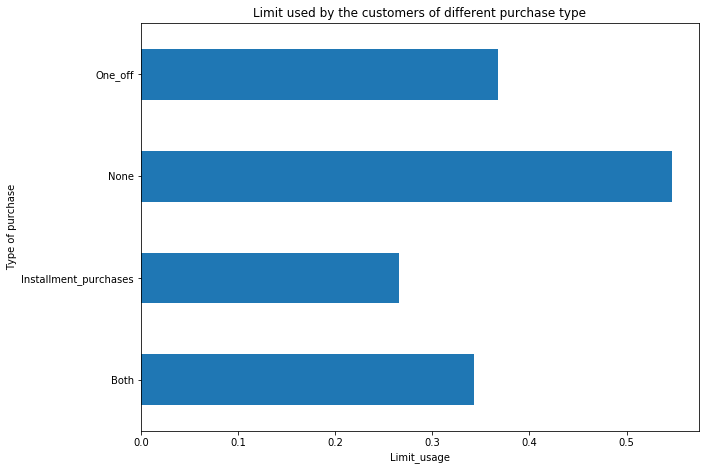

In [30]:
# graphical representation of limit used by the customers of different purchase type
credit.groupby('Purchase_type')['Limit_usage'].mean().plot.barh()
plt.title('Limit used by the customers of different purchase type')
plt.xlabel('Limit_usage')
plt.ylabel('Type of purchase')
plt.show()

> - Lower value implies customers are maintaing thier balance properly. Lower value means good credit score.
> - Hence, Customers with **Installment purchases** have **good credit score**.

### CREATING DUMMY VARIBALES

In [31]:
# creating dummy variables of 'Purchase_by_type' variable for model building
col_dummies = pd.get_dummies(credit['Purchase_type'])
credit = pd.concat([credit, col_dummies], axis = 1)
credit.drop('Purchase_type', axis = 1, inplace = True)

___

<H2> ONE FINAL CONSOLIDATED TABLE

In [32]:
# first five rows of the final dataset
credit.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,Limit_usage,Payment_minpay,Both,Installment_purchases,None,One_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.000000,387.264093,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,124.916667,17.149001,0.222223,0.139867,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1


In [33]:
# shape of the final dataset
credit.shape

(8950, 25)

In [34]:
# a concise summary of the final dataset
credit.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    int64
PURCHASES_TRX                       int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              int64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
Limit_usage                         float64
Payment_minpay     

In [35]:
# number of missing values in the final dataset
credit.isna().sum().sum()

0

___

Before determine the cluster of Customers, we need to conduct PCA to reduce the dimensionality but maintain information as much as possible. Therefore, we need to determine which PCs that we are going to select based on the proportion of variance. But first, we will need to scale the credit dataset.

### STANDARIZING THE DATA

>- Standardization is performed to prevent features with wider ranges from dominating the distance metric. <br><br>
- Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais. <br><br>
- For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

In [36]:
# importing required library for standardization
from sklearn.preprocessing import StandardScaler

# standard scaling
sc = StandardScaler()
credit_scaled = sc.fit_transform(credit)

### APPLYING PCA - PRINCIPAL COMPONENT ANALYSIS

> - In order to handle “curse of dimensionality” and avoid issues like over-fitting in high dimensional space, methods like Principal Component analysis is used.<br><br>
- PCA is a method used to reduce number of variables in the data by extracting important one from a large pool. It reduces the dimension of the data with the aim of retaining as much information as possible. In other words, this method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.

In [37]:
# importing required library to perform Principal component analysis
from sklearn.decomposition import PCA

var_ratio = {}

# applying PCA
for n in range(1, 25):
    pc = PCA(n_components=n)
    credit_pca = pc.fit(credit_scaled)
    var_ratio[n] = sum(credit_pca.explained_variance_ratio_)

In [38]:
# percentage of variance explained by each of the selected components.
var_ratio

{1: 0.28582116626708787,
 2: 0.4902682567108865,
 3: 0.5879169721392071,
 4: 0.6682554341106353,
 5: 0.7194610878747649,
 6: 0.7673876856909397,
 7: 0.8041824237605532,
 8: 0.8401367154041129,
 9: 0.8697143429932384,
 10: 0.8911956202116906,
 11: 0.9124200214202054,
 12: 0.9302365184075443,
 13: 0.9450716516899168,
 14: 0.9584137056862152,
 15: 0.9684882961141352,
 16: 0.9764767579317009,
 17: 0.9837697256387621,
 18: 0.9892865087844769,
 19: 0.9937852281032767,
 20: 0.9968223142724596,
 21: 0.9985009509548277,
 22: 0.9995219770777451,
 23: 0.9998640376463543,
 24: 1.0}

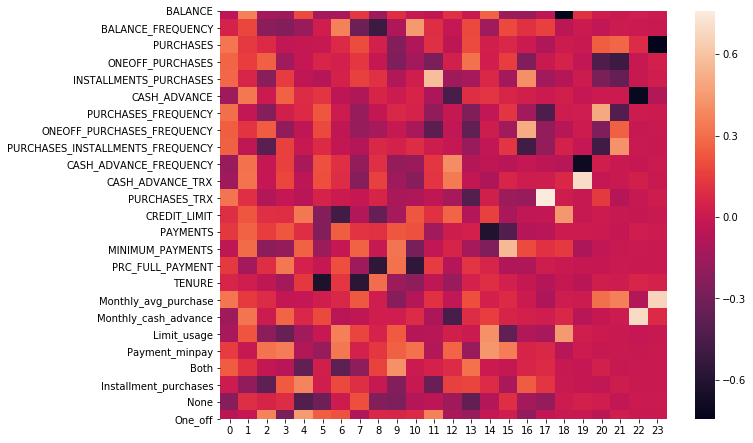

In [39]:
# plotting heatmap of Principal axes in feature space, representing the directions of maximum variance in the data.
sns.heatmap(pd.DataFrame(pc.components_, columns = credit.columns).T)

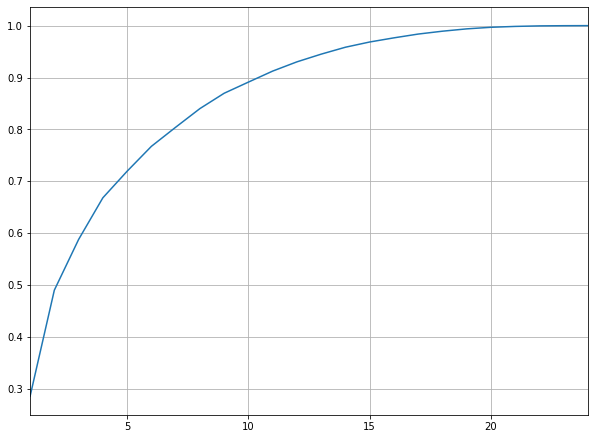

In [40]:
# graphical representation of percentage of variance explained by each of the selected components.
pd.Series(var_ratio).plot(kind='line', grid=True)

> As we can see from the above line graph of percentage of variance explained by each of the selected components. we can conclude that **10 components** explains **89%** of the overall customer information..

In [41]:
# Hence, applying n_components as 10
pc = PCA(n_components = 10)
credit_pca = pc.fit(credit_scaled)

In [42]:
# principal axes in feature space, representing the directions of maximum variance in the data.
pd.DataFrame(credit_pca.components_.T, columns = ['PC_' + str(i) for i in range(10)], index = credit.columns)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
BALANCE,-0.047401,0.364367,-0.137648,-0.146822,0.195124,-0.127710,-0.121188,0.131705,-0.151061,0.098493
BALANCE_FREQUENCY,0.053882,0.182520,-0.215134,-0.239843,-0.167596,0.030516,0.361055,-0.325977,-0.500454,-0.090788
PURCHASES,0.328937,0.141695,0.082936,-0.028400,-0.015669,-0.009472,0.081186,0.201252,0.038460,-0.240384
ONEOFF_PURCHASES,0.267718,0.151998,0.259076,-0.143272,-0.018181,0.060773,0.042071,0.126368,-0.014806,-0.256598
INSTALLMENTS_PURCHASES,0.278818,0.061231,-0.225803,0.145063,-0.035860,-0.079109,0.047414,0.164322,0.112873,-0.082420
CASH_ADVANCE,-0.148502,0.333146,0.006418,0.264192,0.086448,0.120122,-0.044327,-0.096185,0.060444,0.012307
PURCHASES_FREQUENCY,0.306143,-0.022151,-0.234055,0.035735,0.083739,0.227586,0.011815,-0.177936,-0.027457,0.076568
ONEOFF_PURCHASES_FREQUENCY,0.249454,0.117873,0.246201,-0.194323,-0.034869,0.184056,-0.035288,-0.175904,-0.123492,-0.006581
PURCHASES_INSTALLMENTS_FREQUENCY,0.258223,-0.035837,-0.389788,0.156449,-0.005902,0.081141,-0.026258,-0.069119,0.077330,0.044538
CASH_ADVANCE_FREQUENCY,-0.170773,0.307674,-0.012959,0.156184,-0.108603,0.212362,0.105513,-0.185786,0.106035,-0.181434


In [43]:
# Factor Analysis : variance explained by each component
pd.Series(credit_pca.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(10)])

PC_0    0.285821
PC_1    0.204447
PC_2    0.097649
PC_3    0.080338
PC_4    0.051206
PC_5    0.047927
PC_6    0.036795
PC_7    0.035954
PC_8    0.029578
PC_9    0.021481
dtype: float64

 Based on interepertations from above, we decided to take only **10 dimensions** and put it to new dataset called **credit_new**.

In [44]:
# deriving dataframe from pca to perform clustering
reduced_credit = credit_pca.fit_transform(credit_scaled)
credit_new = pd.DataFrame(reduced_credit)

In [45]:
# shape of the new dataframe
credit_new.shape

(8950, 10)

In [46]:
# first five rows of the new dataframe
credit_new.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.313513,-2.838654,-0.542384,0.025271,0.431845,-0.290160,0.009593,-0.060717,0.512050,-0.789461
1,-3.174895,3.083190,0.553046,1.884478,0.187044,-1.296895,-0.206185,-0.000559,-0.691925,0.386282
2,0.860594,-0.093187,1.535339,-2.641136,1.580645,0.637443,-0.352804,-0.978637,-1.015126,-0.269088
3,-0.395109,-0.465372,2.128858,-1.636651,1.672140,-0.105706,-0.856438,0.607515,0.352004,-1.096478
4,-1.756117,-1.559736,0.908750,-2.131489,0.431850,0.068187,1.097879,-0.365269,0.286701,0.527100


___

After defining which dimensions that are going to used in **Clustering**, now we will use **K-Means** to determine how many **Clusters** do we need to divide Customers, which may represents their profile and we will determine what kind of **treatment** should be given to them.

## CLUSTERING

> Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

- ## K-Means
> **K-means clustering algorithm** – It is the simplest unsupervised learning algorithm that solves clustering problem. K-means algorithm partition n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster .

In [47]:
# for clustering
from sklearn.cluster import KMeans

# to check performance matrix
from sklearn.metrics import silhouette_score

wcss = []
score = {}

for n in range(2, 15):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
    kmeans.fit(credit_new)
    wcss.append(kmeans.inertia_)
    score[n] = silhouette_score(credit_new, kmeans.labels_)

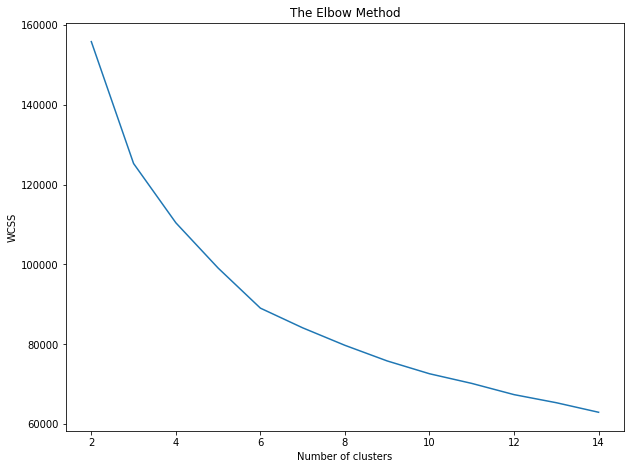

In [49]:
# Plotting elbow curve
plt.plot(range(2, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

>Based on the **Elbow Method**, we can say that the potential number of cluster (k) that may represents the customer segmentation is 6 because the line steadily declined after the **6 clusters**.

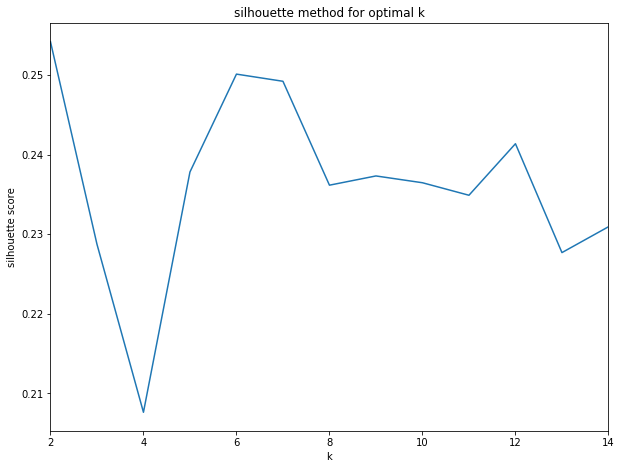

In [50]:
# plotting silhouette score
pd.Series(score).plot()
plt.title('silhouette method for optimal k')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

> - The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). <br><br>
- The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. <br><br>
- Hence, **silhouette score** also suggests that **k=6** should be chosen for the number of clusters.

### FINDING BEHAVIOUR WITH 6 CLUSTERS

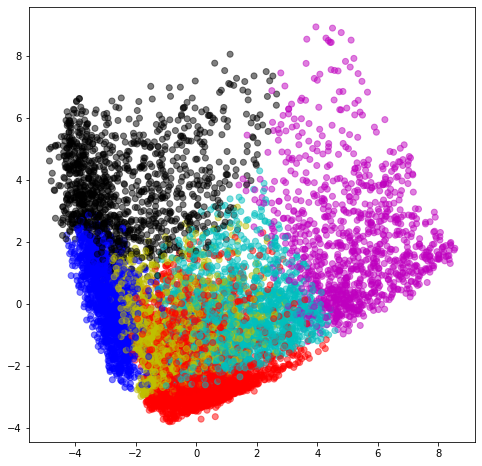

In [51]:
# creating 6 clusters
kmeans_6 = KMeans(n_clusters=6, random_state=42).fit(credit_new)

# cluster visualisation
color_map = {0:'r', 1:'b', 2:'y', 3:'c', 4:'m', 5:'k'}
label_color = [color_map[l] for l in kmeans_6.labels_]
plt.figure(figsize = (8, 8))
plt.scatter(credit_new.iloc[:, 0], credit_new.iloc[:, 1], c=label_color, cmap='Spectral', alpha=0.5)
plt.show()

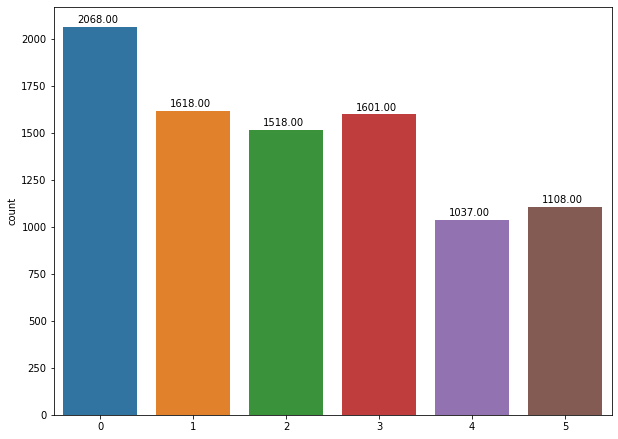

In [52]:
# graphical representation of frequency count of each cluster
ax = sns.countplot(kmeans_6.labels_)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+20))

In [53]:
# Key performace variable selection . Here I am dropping varibales which were used in derving new KPI
col_kpi = ['PURCHASES_TRX','CREDIT_LIMIT', 'CASH_ADVANCE_TRX', 'Monthly_avg_purchase', 'Monthly_cash_advance', 
           'Limit_usage', 'Payment_minpay', 'Both', 'Installment_purchases', 'None', 'One_off']

In [54]:
# Conactenating labels found through Kmeans with data 
cluster_df_6 = pd.concat([credit[col_kpi], pd.Series(kmeans_6.labels_, name = 'Cluster_6')], axis=1)
cluster_df_6.head()

,PURCHASES_TRX,CREDIT_LIMIT,CASH_ADVANCE_TRX,Monthly_avg_purchase,Monthly_cash_advance,Limit_usage,Payment_minpay,Both,Installment_purchases,None,One_off,Cluster_6
0,2,1000.0,0,7.950000,0.000000,0.040901,1.446508,0,1,0,0,0
1,0,7000.0,4,0.000000,387.264093,0.457495,3.826241,0,0,1,0,5
2,12,7500.0,0,64.430833,0.000000,0.332687,0.991682,0,0,0,1,2
3,1,7500.0,1,124.916667,17.149001,0.222223,0.139867,0,0,0,1,2
4,1,1200.0,0,1.333333,0.000000,0.681429,2.771075,0,0,0,1,2


In [55]:
# finding mean value for each variable for each cluster
six_cluster = cluster_df_6.groupby('Cluster_6')[col_kpi].mean().T
six_cluster.head()

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,11.367021,0.056860,5.732543,18.588382,42.681774,6.498195
CREDIT_LIMIT,2980.688290,2957.468059,3850.678924,4162.999956,7344.069431,7225.816377
CASH_ADVANCE_TRX,0.443907,4.129172,1.214756,1.158651,1.688525,10.288809
Monthly_avg_purchase,42.276995,0.173424,50.207862,85.053448,281.146611,35.848877
Monthly_cash_advance,11.557049,96.376774,24.007029,20.392584,44.294111,321.955605


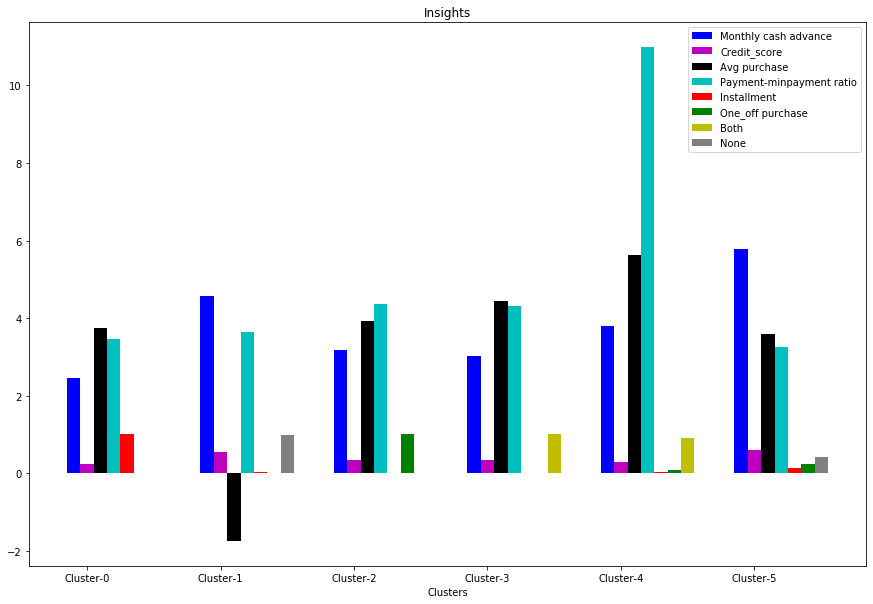

In [56]:
fig,ax = plt.subplots(figsize=(15, 10))
index = np.arange(len(six_cluster.columns))

cash_advance = np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score = (six_cluster.loc['Limit_usage',:].values)
purchase = np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment = six_cluster.loc['Payment_minpay',:].values
installment = six_cluster.loc['Installment_purchases',:].values
one_off = six_cluster.loc['One_off',:].values
both = six_cluster.loc['Both',:].values
none = six_cluster.loc['None',:].values

bar_width = .10
b1 = plt.bar(index, cash_advance, color='b', label='Monthly cash advance', width=bar_width)
b2 = plt.bar(index + bar_width, credit_score, color = 'm', label='Credit_score', width=bar_width)
b3 = plt.bar(index + 2 * bar_width, purchase, color='k', label='Avg purchase', width=bar_width)
b4 = plt.bar(index + 3 * bar_width, payment, color='c', label='Payment-minpayment ratio', width=bar_width)
b5 = plt.bar(index + 4 * bar_width, installment, color='r', label='Installment', width=bar_width)
b6 = plt.bar(index + 5 * bar_width, one_off, color='g', label='One_off purchase', width=bar_width)
b7 = plt.bar(index + 6 * bar_width, both, color='y', label='Both', width=bar_width)
b8 = plt.bar(index + 6 * bar_width, none, color='#808080', label='None', width=bar_width)

plt.xlabel("Clusters")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cluster-0', 'Cluster-1', 'Cluster-2', 'Cluster-3','Cluster-4','Cluster-5'))
plt.legend()
plt.show()

## INSIGHTS OF CLUSTERS

- **Cluster 0** with 2068 customers: Customers on this cluster give lowest cash in advance but has highest credit score and are doing maximum installment purchase transactions. **This group is about 23% of the total customer base**. <br><br>

- **Cluster 1** with 1618 customers: These customers give a lot of cash in advance, but unfortunatley there is no spending on Purchases and comparitively have poor credit score. **This group is about 18% of the total customer base**.<br><br>

- **Cluster 2** with 1518 customers: Customers in this cluster give less cash in advance and has maximum one off purchase transactions i.e. Maximum purchase amount done in one-go. **This group is about 17% of the total customer base**.<br><br>

- **Cluster 3** with 1601 customers: Customers of this cluster have similar behaviour with customers of cluster 0. Customers of this cluster give low cash in advance and are doing both installment as well as one_off purchase transactions. **This group is about 18% of the total customer base**.<br><br>
    
- **Cluster 4** with 1037 customers: Customers in this cluster are doing maximum purchase transactions and paying dues on time. They have good credit score and are doing both installment as well as one_off purchase transactions. **This group is about 12% of the total customer base**.<br><br>
    
- **Cluster 5** with 1108 customers: Customers in this cluster give maximum cash in advance but has poorest credit score. Moreover, they are not doing transactions frequently. **This group is about 12% of the total customer base**.

___

## MARKET STRATEGY SUGGESTED

### CLUSTER 0
    
- These customers have maximum installment purchase with a good credit score.
    - we can increase credit limit or can lower down interest rate.
    - we can bring out **NO COST EMI** offers especially for this group.<br>


### CLUSTER 1
-  These customers give a lot cash in advance, but unfortunatley their spending on Purchases is still minimum. 
    - These customers are actually a quite potential Customers.
    - We should attract them to apply installment even with the 0% interest at the beginning.<br>
    

### CLUSTER 2
-  These customers give low cash in advance and using card for just oneoff transactions (may be for utility bills only). 
    - This group seems to be risky group.
    - This indicates they are non-potential customers.<br>
    

### CLUSTER 3
-  Customers in this Cluster are potential, since they spend Purchases in medium amount. 
    - A cash back program may attract them to use their credit card in bigger Purchase. 
    - We can even bring out some discount offers for this group.<br>
    

### CLUSTER 4
-  These customers are our “Big Spenders”. They use their Credit Cards effectively with big Purchases.
    - Giving reward points may keep them on using the Credit Card.
    - We can give them PREMIUM CARD OR LOYALTY CARD to increase transactions. <br>
    

### CLUSTER 5
-  These customers tend to keep their Credit Card and avoid to use it for transactions (Low Purchases)
    - We could give them some gimmicks as the first user, so they will be attracted to use their Credit Card more often.
    - We can bring out bumper offers especially for these users on credit card transactions.

<center> <h1> END

___